<a href="https://colab.research.google.com/github/tvaditya/intro_ds_and_ml/blob/main/%5BT_V_Aditya%5D_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [1]:
# importar os pacotes necessários
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix 


Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [2]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

Lembre-se de realizar o *split* dos conjuntos, para evitar o vazamento de dados.

Feito isso, vamos à Análise Exploratória.

## Análise Exploratória

Abordar tópicos/informações como:



In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


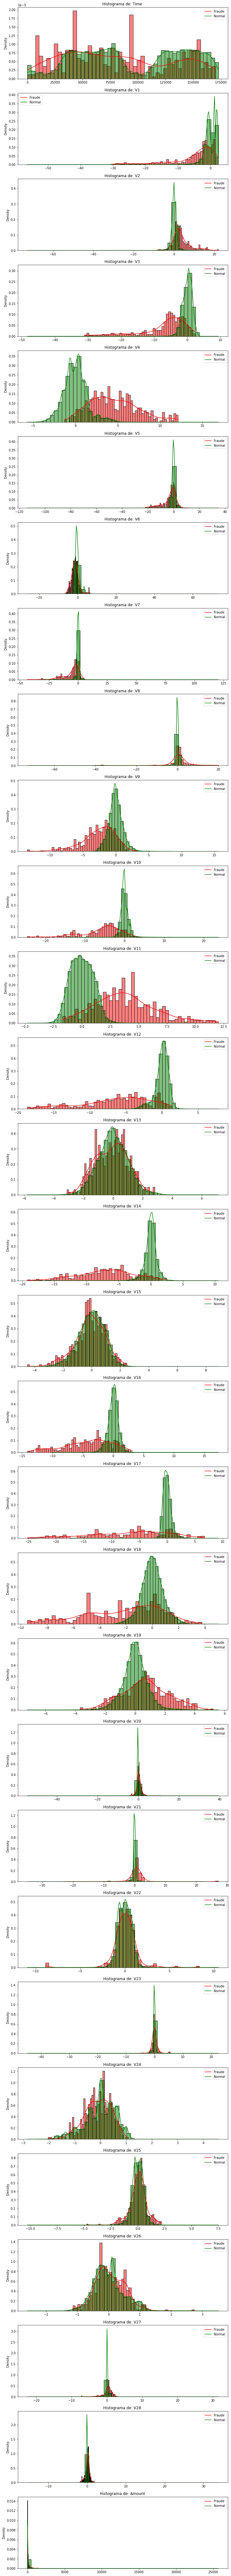

In [6]:
features = df.iloc[:,0:30].columns
plt.figure(figsize=(12,30*5))
gs = gridspec.GridSpec(30, 1)
for idx, col in enumerate(df[features]):
 ax = plt.subplot(gs[idx])
 sns.histplot(df[col][df.Class == 1], bins=50, color="red", kde=True, stat='density')
 sns.histplot(df[col][df.Class == 0], bins=50, color="green", kde=True, stat='density')
 ax.set_xlabel("")
 ax.set_title(f"Histograma de: {str(col)} ")
 ax.legend(labels=['Fraude', 'Normal'])
plt.show()

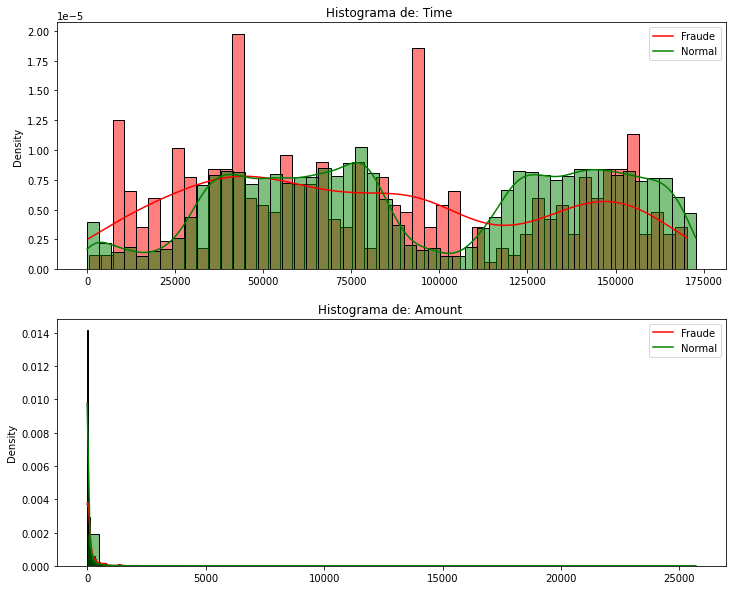

In [7]:
df_new = df[['Time', 'Amount']]
features = df_new.iloc[:, 0:2].columns
plt.figure(figsize=(12,2*5))
gs = gridspec.GridSpec(2, 1)
for idx, col in enumerate(df[features]):
 ax = plt.subplot(gs[idx])
 sns.histplot(df[col][df.Class == 1], bins=50, color="red", kde=True, stat='density')
 sns.histplot(df[col][df.Class == 0], bins=50, color="green", kde=True, stat='density')
 ax.set_xlabel("")
 ax.set_title(f"Histograma de: {str(col)} ")
 ax.legend(labels=['Fraude', 'Normal'])
plt.show()

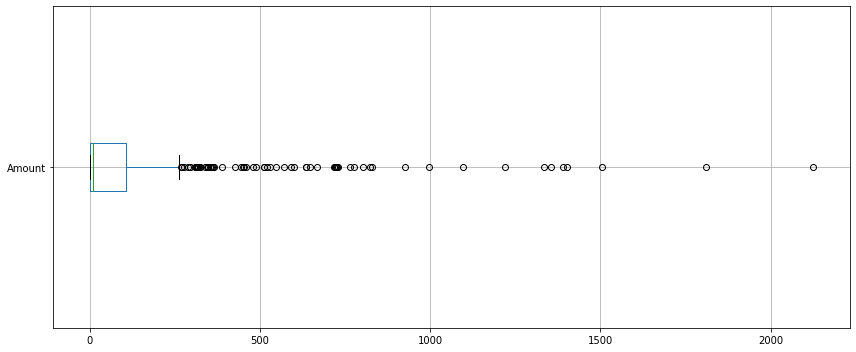

In [8]:
fig, ax = plt.subplots(figsize=(12,5))

df.loc[df['Class']==1].boxplot(['Amount'], vert=False, ax=ax)

plt.tight_layout()

In [9]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
df.loc[df['Class']==1]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

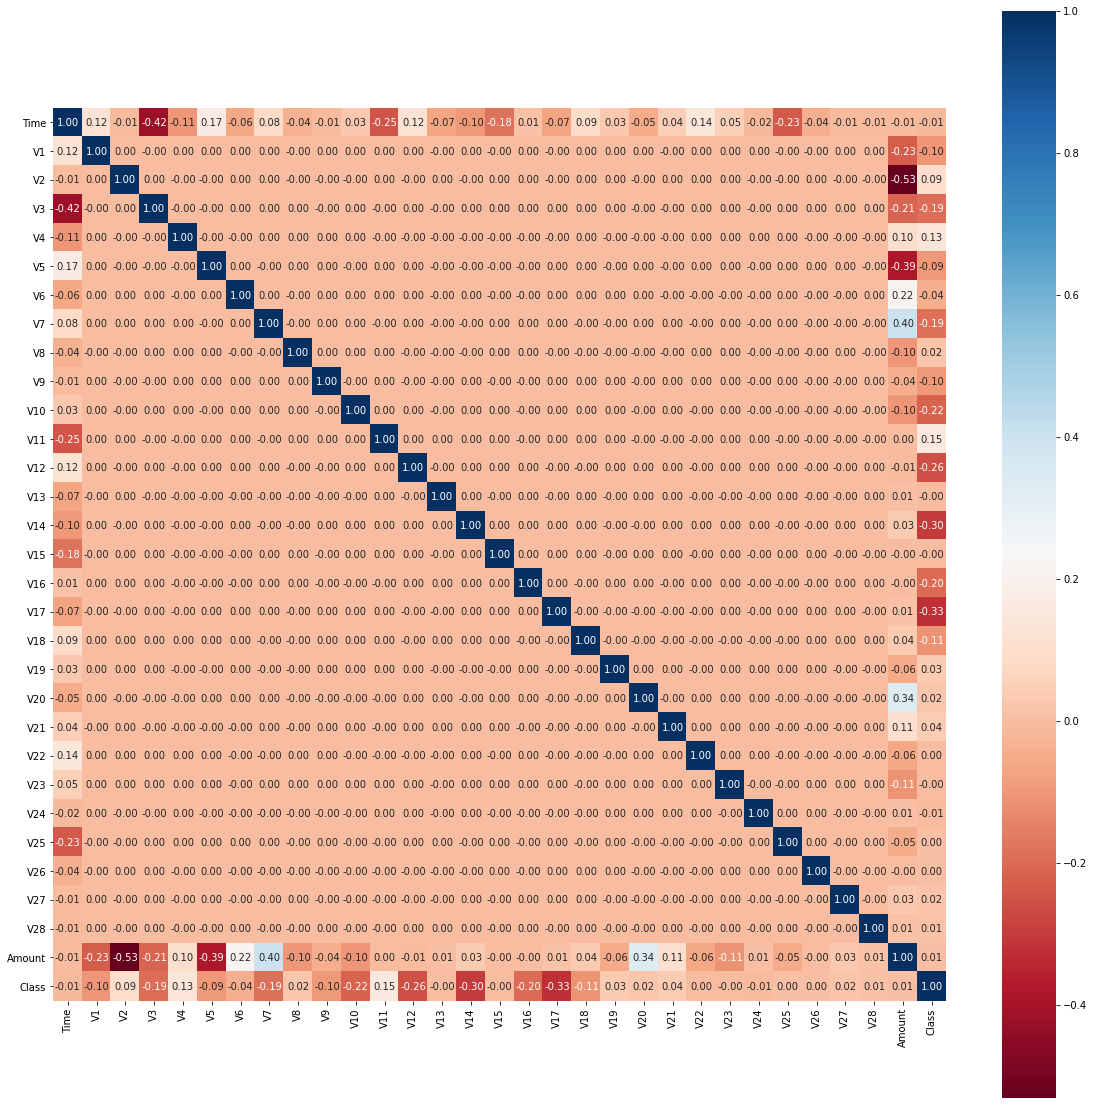

In [11]:
cormat = df.corr()
fig = plt.figure(figsize=(20, 20))
sns.heatmap(cormat, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)
plt.show()

Por se tratar de fraudes em cartão de crédito sabemos que é um conjunto bem desbalanceado. Vamos olhar a percentagem de cada classe.

In [12]:
fraudes = df[df['Class'] == 1]
normais = df[df['Class'] == 0]
print(f"A quantidade de fraudes é: {fraudes.shape[0]}")
print(f"A quantidade de normais é: {normais.shape[0]}")
print(f"A percentagem de fraudes é: {len(fraudes)*100/len(df):0.3f}%")


A quantidade de fraudes é: 492
A quantidade de normais é: 284315
A percentagem de fraudes é: 0.173%


## Preparação dos Dados

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e validação
* [*Recomendado*] Balancear o conjunto de dados

In [13]:
X =df.iloc[:,:-1]
Y =df.iloc[:,-1]
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=2021)
X_train1, X_test1, Y_train1, Y_test1=train_test_split(X, Y, test_size=0.2, random_state=42)

## Modelo de Machine Learning

* Construiremos um modelo de  **classificação** para servir de base em cima dele
* Depois iremos adicionar mais classificadores e comparar o desempenho com o modelo de base.

In [14]:
classifier=LogisticRegression() 
classifier.fit(X_train, Y_train) 
Y_pred=classifier.predict(X_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
ps = precision_score(Y_test, Y_pred)
rs = recall_score(Y_test, Y_pred)
f1 = 2*(ps*rs)/(ps+rs)

In [16]:
print("Acurracy:", round(accuracy_score(Y_test, Y_pred),4))
print("F1 Score: ", round(f1, 4))
print("Precision:", round(precision_score(Y_test, Y_pred),4))
print("Recall:", round(recall_score(Y_test, Y_pred),4))

Acurracy: 0.999
F1 Score:  0.7071
Precision: 0.7368
Recall: 0.6796


Desempenho do nosso modelo base

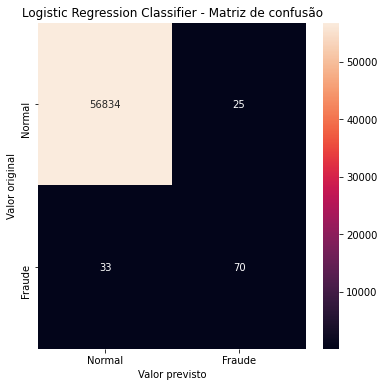

In [17]:
labels= ['Normal', 'Fraude'] 
conf_matrix=confusion_matrix(Y_test, Y_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Logistic Regression Classifier - Matriz de confusão") 
plt.ylabel('Valor original') 
plt.xlabel('Valor previsto') 
plt.show()

In [18]:
classifier=LogisticRegression() 
classifier.fit(X_train1, Y_train1) 
Y_pred1=classifier.predict(X_test1) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
ps = precision_score(Y_test1, Y_pred1)
rs = recall_score(Y_test1, Y_pred1)
f1 = 2*(ps*rs)/(ps+rs)

In [20]:
print("Acurracy:", round(accuracy_score(Y_test1, Y_pred1),4))
print("F1 Score: ", round(f1, 4))
print("Precision:", round(precision_score(Y_test1, Y_pred1),4))
print("Recall:", round(recall_score(Y_test1, Y_pred1),4))

Acurracy: 0.9986
F1 Score:  0.5851
Precision: 0.6111
Recall: 0.5612


Vemos que apenas mudando o **random_state** tivemos uma queda significantate no **recall** , isso acontece devido ao desbalanacemento dos dados, esse efeito é comum nesses casos.

Vamos então resolver esse desbalanceamento com algumas tecnicas providas na lib imabalanced-learn.

In [21]:
# Ele já vem por default no Google Colab, mas caso esteja fora dele segue o comando pip abaixo
!pip install imbalanced-learn

## Analise com o tratamento do desbalaceamento do conjunto de dados ##

Feito isso vamos fazer um **undersampling** onde balanceamos o conjunto de dados diminuindo a classe maior.

In [22]:
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [23]:
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42, replacement=True)
X_resampled_under, Y_resampled_under =rus.fit_resample(X_train, Y_train)
print(f"X_resampled_under {X_resampled_under.shape} ")
print(f"Y_resampled_under {Y_resampled_under.shape} ")
print(f"X_train {X_train.shape} ")
print(f"Y_train {Y_train.shape} ")

X_resampled_under (778, 30) 
Y_resampled_under (778,) 
X_train (227845, 30) 
Y_train (227845,) 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [24]:
classifier=LogisticRegression() 
classifier.fit(X_resampled_under, Y_resampled_under) 
Y_pred=classifier.predict(X_test) 

In [25]:
ps = precision_score(Y_test, Y_pred)
rs = recall_score(Y_test, Y_pred)
f1 = 2*(ps*rs)/(ps+rs)

In [26]:
print("Acurracy:", round(accuracy_score(Y_test, Y_pred),4))
print("F1 Score: ", round(f1, 4))
print("Precision:", round(precision_score(Y_test, Y_pred),4))
print("Recall:", round(recall_score(Y_test, Y_pred),4))

Acurracy: 0.969
F1 Score:  0.0907
Precision: 0.0479
Recall: 0.8544


In [27]:
print(classification_report(Y_test, Y_pred, target_names=['Normal', 'Fraude']))

              precision    recall  f1-score   support

      Normal       1.00      0.97      0.98     56859
      Fraude       0.05      0.85      0.09       103

    accuracy                           0.97     56962
   macro avg       0.52      0.91      0.54     56962
weighted avg       1.00      0.97      0.98     56962



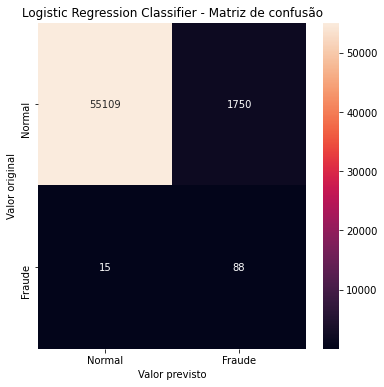

In [28]:
labels= ['Normal', 'Fraude'] 
conf_matrix=confusion_matrix(Y_test, Y_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Logistic Regression Classifier - Matriz de confusão") 
plt.ylabel('Valor original') 
plt.xlabel('Valor previsto') 
plt.show()

Como é um modelo que não é cost sensitive podemos prosseguir mesmo com a precisão baixa. 


### Testando o que acontece se normalizarmos **Time** e **Amount**

Vamos normmalizar os features descritos para ver se temos alguma mudança significativa no modelo.

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

time = df['Time'].values
df['Time'] = sc.fit_transform(time.reshape(-1, 1))

In [31]:
X =df.iloc[:,:-1]
Y =df.iloc[:,-1]
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=2021)


In [32]:
X_resampled_under, Y_resampled_under =rus.fit_resample(X_train, Y_train)
print(f"X_resampled_under {X_resampled_under.shape} ")
print(f"Y_resampled_under {Y_resampled_under.shape} ")
print(f"X_train {X_train.shape} ")
print(f"Y_train {Y_train.shape} ")

X_resampled_under (778, 30) 
Y_resampled_under (778,) 
X_train (227845, 30) 
Y_train (227845,) 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [33]:
classifier=LogisticRegression() 
classifier.fit(X_resampled_under, Y_resampled_under) 
Y_pred=classifier.predict(X_test) 

In [34]:
ps = precision_score(Y_test, Y_pred)
rs = recall_score(Y_test, Y_pred)
f1 = 2*(ps*rs)/(ps+rs)

In [35]:
print("Acurracy:", round(accuracy_score(Y_test, Y_pred),4))
print("F1 Score: ", round(f1, 4))
print("Precision:", round(precision_score(Y_test, Y_pred),4))
print("Recall:", round(recall_score(Y_test, Y_pred),4))

Acurracy: 0.9636
F1 Score:  0.0848
Precision: 0.0444
Recall: 0.932


In [36]:
print(classification_report(Y_test, Y_pred, target_names=['Normal', 'Fraude']))

              precision    recall  f1-score   support

      Normal       1.00      0.96      0.98     56859
      Fraude       0.04      0.93      0.08       103

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962



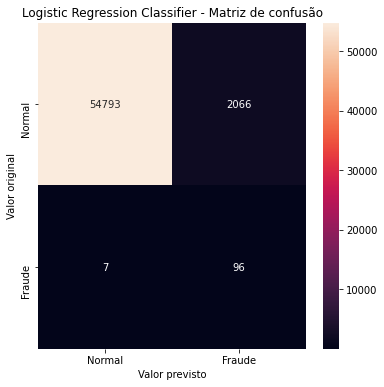

In [37]:
labels= ['Normal', 'Fraude'] 
conf_matrix=confusion_matrix(Y_test, Y_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Logistic Regression Classifier - Matriz de confusão") 
plt.ylabel('Valor original') 
plt.xlabel('Valor previsto') 
plt.show()

Vemos que houve uma boa melhoria no recall então vamos seguir com os features normalizados.

## Testando diversos modelos

Alguns modelos serão testados com outros classificadores para ver qual deles tem o melhor desempenho. Como métrica de comparação daremos preferencia ao **recall**.

In [38]:
# Iremos usar os 4 classificacores abaixo
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [39]:
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_resampled_under, Y_resampled_under) 
Y_pred = DT.predict(X_test)

In [40]:
ps = precision_score(Y_test, Y_pred)
rs = recall_score(Y_test, Y_pred)
f1 = 2*(ps*rs)/(ps+rs)

In [41]:
print("Acurracy:", round(accuracy_score(Y_test, Y_pred),4))
print("F1 Score: ", round(f1, 4))
print("Precision:", round(precision_score(Y_test, Y_pred),4))
print("Recall:", round(recall_score(Y_test, Y_pred),4))

Acurracy: 0.9586
F1 Score:  0.0717
Precision: 0.0374
Recall: 0.8835


In [42]:
print(classification_report(Y_test, Y_pred, target_names=['Normal', 'Fraude']))

              precision    recall  f1-score   support

      Normal       1.00      0.96      0.98     56859
      Fraude       0.04      0.88      0.07       103

    accuracy                           0.96     56962
   macro avg       0.52      0.92      0.53     56962
weighted avg       1.00      0.96      0.98     56962



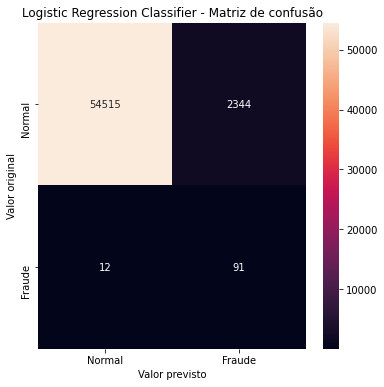

In [43]:
labels= ['Normal', 'Fraude'] 
conf_matrix=confusion_matrix(Y_test, Y_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Logistic Regression Classifier - Matriz de confusão") 
plt.ylabel('Valor original') 
plt.xlabel('Valor previsto') 
plt.show()

In [44]:
svm = SVC()
svm.fit(X_resampled_under, Y_resampled_under) 
Y_pred = svm.predict(X_test)

In [45]:
ps = precision_score(Y_test, Y_pred)
rs = recall_score(Y_test, Y_pred)
f1 = 2*(ps*rs)/(ps+rs)

In [46]:
print("Acurracy:", round(accuracy_score(Y_test, Y_pred),4))
print("F1 Score: ", round(f1, 4))
print("Precision:", round(precision_score(Y_test, Y_pred),4))
print("Recall:", round(recall_score(Y_test, Y_pred),4))

Acurracy: 0.98
F1 Score:  0.1406
Precision: 0.0762
Recall: 0.9029


In [47]:
print(classification_report(Y_test, Y_pred, target_names=['Normal', 'Fraude']))

              precision    recall  f1-score   support

      Normal       1.00      0.98      0.99     56859
      Fraude       0.08      0.90      0.14       103

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962



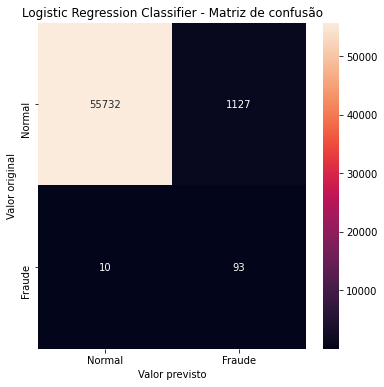

In [48]:
labels= ['Normal', 'Fraude'] 
conf_matrix=confusion_matrix(Y_test, Y_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Logistic Regression Classifier - Matriz de confusão") 
plt.ylabel('Valor original') 
plt.xlabel('Valor previsto') 
plt.show()

In [49]:
RF = RandomForestClassifier(max_depth = 4)
RF.fit(X_resampled_under, Y_resampled_under) 
Y_pred = RF.predict(X_test)

In [50]:
ps = precision_score(Y_test, Y_pred)
rs = recall_score(Y_test, Y_pred)
f1 = 2*(ps*rs)/(ps+rs)

In [51]:
print("Acurracy:", round(accuracy_score(Y_test, Y_pred),4))
print("F1 Score: ", round(f1, 4))
print("Precision:", round(precision_score(Y_test, Y_pred),4))
print("Recall:", round(recall_score(Y_test, Y_pred),4))

Acurracy: 0.9878
F1 Score:  0.2098
Precision: 0.1189
Recall: 0.8932


In [52]:
print(classification_report(Y_test, Y_pred, target_names=['Normal', 'Fraude']))

              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99     56859
      Fraude       0.12      0.89      0.21       103

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.60     56962
weighted avg       1.00      0.99      0.99     56962



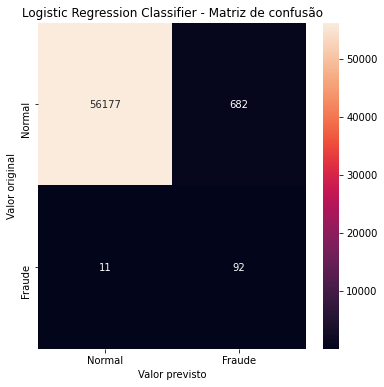

In [53]:
labels= ['Normal', 'Fraude'] 
conf_matrix=confusion_matrix(Y_test, Y_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Logistic Regression Classifier - Matriz de confusão") 
plt.ylabel('Valor original') 
plt.xlabel('Valor previsto') 
plt.show()

In [54]:

X_t = X_test.values

XGB = XGBClassifier(max_depth = 4)
XGB.fit(X_resampled_under, Y_resampled_under) 
Y_pred = XGB.predict(X_t)

In [55]:
ps = precision_score(Y_test, Y_pred)
rs = recall_score(Y_test, Y_pred)
f1 = 2*(ps*rs)/(ps+rs)

In [56]:
print("Acurracy:", round(accuracy_score(Y_test, Y_pred),4))
print("F1 Score: ", round(f1, 4))
print("Precision:", round(precision_score(Y_test, Y_pred),4))
print("Recall:", round(recall_score(Y_test, Y_pred),4))

Acurracy: 0.9635
F1 Score:  0.0845
Precision: 0.0443
Recall: 0.932


In [57]:
print(classification_report(Y_test, Y_pred, target_names=['Normal', 'Fraude']))

              precision    recall  f1-score   support

      Normal       1.00      0.96      0.98     56859
      Fraude       0.04      0.93      0.08       103

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962



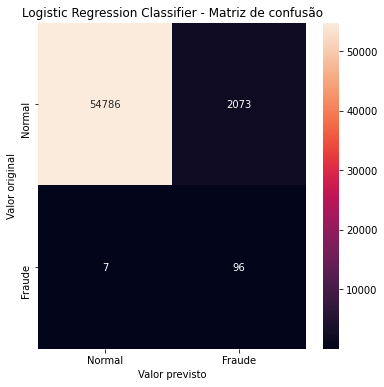

In [58]:
labels= ['Normal', 'Fraude'] 
conf_matrix=confusion_matrix(Y_test, Y_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Logistic Regression Classifier - Matriz de confusão") 
plt.ylabel('Valor original') 
plt.xlabel('Valor previsto') 
plt.show()

In [59]:
# fit(X_resampled_under, Y_resampled_under) 

## Avaliar o desempenho do modelo

Dos 5 modelos testados vimos que a regressão logistica e o XGBoost nos trouxeram os melhores resultados, segundo a métrica de nossa escolha que foi o **recall**, ambos tiveram 0.932 o que é muito bom.

## Conclusão

